---
title: "Case Study: Handwritten Digit Recognition with K-Means"
subject: Inner Products and Norms
subtitle: 
short_title: "Case Study: Handwritten Digit Recognition with K-Means"
authors:
  - name: Nikolai Matni
    affiliations:
      - Dept. of Electrical and Systems Engineering
      - University of Pennsylvania
    email: nmatni@seas.upenn.edu
license: CC-BY-4.0
keywords: K-Means, Clustering, MNIST
math:
  '\vv': '\mathbf{#1}'
  '\bm': '\begin{bmatrix}'
  '\em': '\end{bmatrix}'
  '\R': '\mathbb{R}'
---

K-means falls into the category of *unsupervised machine learning* algorithms, or algorithms which take a dataset and output patterns from that dataset. K-means, being a clustering algorithm, extracts clusters from a dataset of vectors. This is in contrast to *supervised machine learning* algorithms, which take a dataset consisting of input-output pairs, and try to learn a function mapping inputs to outputs.

In this case study, we're going to apply the [k-means algorithm](#k-means-alg) to a dataset consisting of 1797 handwritten digits. Our objective is to identify groups of similar digits. To that end, we will:

* use k-means to group these digits into 20 clusters,

* visualize the clustering representatives,

* measure how well k-means clustered different digits,

* measure which pairs of digits k-means did well/poor in differentiating.

# The UCI-Test Dataset

The UCI-Test dataset is a dataset consisting of 1797 handwritten digits, which are represented by $8 \times 8$ pixel greyscale images. A few examples of images from the dataset are below:

![25 images from UCI-Test](../figures/04-mnist_sample.png)

Although not pictured above, the UCI-Test dataset is actually a labeled dataset, which means it contains input-output pairs (where the inputs are the images and the outputs are what digit an image represents). We can load the dataset, which conveniently comes with the ```scikit-learn``` library, as follows:

In [49]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


The ```digits.data``` variable is an 1797-by-64 matrix representing a collection of 1797 8-by-8 images; each column of this matrix has 64 entries and represents a "flattened" 8-by-8 image (where each block of 8 entries represents a column of the image).

The ```digits.target``` variable is a vector with 1797 entries representing the human-given labels (an integer from 0 to 9) of the corresponding image. For example, ```digits.target[0]``` is the digit value of ```digits.data[0, :]```.

# Clustering the Images with K-Means

K-means, as an unsupervised learning algorithm, does not require knowledge of the labels. Instead of learning to predict whether an image is a zero, one, two, etc. (which requires knowledge of the labels), k-means groups similar images together, and hence only needs the ```digits.data``` variable.

The clustering can be performed with the ```scikit-learn``` library, as we did in the previous section. Notice that we chose to use 20 clusters, even though there are only 10 digits; in practice, the number of clusters is often unknown.

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=10)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(20, 64)

The result is 20 clusters in 64 dimensions. Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster.

## Visualizing cluster centers

Let's see what these cluster centers look like:

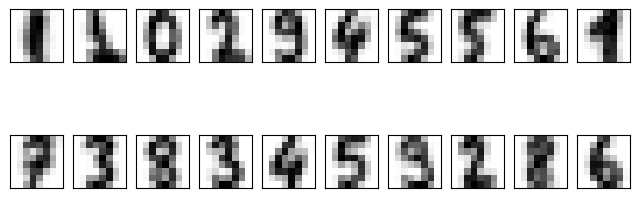

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 10, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(20, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that *even without the labels*, k-means is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

## Labeling the cluster centers

We emphasize that k-means *does not* know the true identity of each cluster, because it was never given the labels. We can fix this by matching each learned cluster with the true labels found in them. In this example, we choose to match each cluster to the label it contains the most of (remember that the labels are given in ```digits.target```):

In [52]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(20):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

## Checking accuracy and forming a confusion matrix

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data. The 

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.9098497495826378